In [184]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sympy.functions.combinatorial.numbers import jacobi_symbol

from sympy.ntheory import isprime

import time
import timeit

## Алгоритм Соловея-Штрассена

In [185]:
def is_prime1(m, k): # Базовый алгоритм Соловея-Штрассена
    # Простые и составные числа - натуральные числа (по определению):
    if not(type(m) is int and type(k) is int and m > 0 and k > 0):
        print('Подайте на вход натуральные числа')
        return None

    if m == 2: # В символе Якоби m - нечетное число (+ теорема для нечетного составного)
        return True

    if m == 1 or m % 2 == 0:
        return False

    for i in range(k):
        a = random.randint(1, m - 1)
        if math.gcd(a, m) > 1:
            return False

        x = pow(a, (m - 1) // 2, m) # Для читаемости сохранил в переменные
        y = jacobi_symbol(a, m)
        if (x - y) % m != 0:
            return False

    return True

divide_border = 100
small_divs = [num for num in range(3, divide_border, 2) if isprime(num)]

def is_prime2(m, k): # Алгоритм Соловея-Штрассена без отдельного расчета НОДа + с перебором маленьких делителей
    if not(type(m) is int and type(k) is int and m > 0 and k > 0):
        print('Подайте на вход натуральные числа')
        return None

    if m == 2:
        return True

    if m == 1 or m % 2 == 0:
          return False

    for div in small_divs:
        if m != div and m % div == 0:
            return False

    for i in range(k):
        a = random.randint(1, m - 1)

        x = pow(a, (m - 1) // 2, m)
        y = jacobi_symbol(a, m)
        if y == 0 or (x - y) % m != 0:
            return False

    return True

Проверим, что написано что-то адекватное (сверим ответы со встроенной функцией из sympy)

In [178]:
for num in range(1, 100000):
    if(is_prime1(num, 20) != isprime(num)):
        print(f'Для числа {num} получили неверный ответ')

In [180]:
for num in range(1, 100000):
    if(is_prime2(num, 20) != isprime(num)):
        print(f'Для числа {num} получили неверный ответ')

## Зависимости от m

In [186]:
primes = []
composites = []
degrees = range(5, 64, 5)

for degree in degrees:
    for num in range(2**degree + 1, 2**degree + 1000, 2):
        if isprime(num):
            primes.append(num)
            break

    for num in range(2**degree + 1, 2**degree + 1000, 2):
        if not(isprime(num)):
            composites.append(num)
            break

In [189]:
setup = '''
import numpy as np
import random
import math
from sympy.functions.combinatorial.numbers import jacobi_symbol
from sympy.ntheory import isprime

def is_prime1(m, k): # Базовый алгоритм Соловея-Штрассена
    # Простые и составные числа - натуральные числа (по определению):
    if not(type(m) is int and type(k) is int and m > 0 and k > 0):
        print('Подайте на вход натуральные числа')
        return None

    if m == 2: # В символе Якоби m - нечетное число (+ теорема для нечетного составного)
        return True

    if m == 1 or m % 2 == 0:
        return False

    for i in range(k):
        a = random.randint(1, m - 1)
        if math.gcd(a, m) > 1:
            return False

        x = pow(a, (m - 1) // 2, m) # Для читаемости сохранил в переменные
        y = jacobi_symbol(a, m)
        if (x - y) % m != 0:
            return False

    return True

divide_border = 100
small_divs = [num for num in range(3, divide_border, 2) if isprime(num)]

def is_prime2(m, k): # Алгоритм Соловея-Штрассена без отдельного расчета НОДа + с перебором маленьких делителей
    if not(type(m) is int and type(k) is int and m > 0 and k > 0):
        print('Подайте на вход натуральные числа')
        return None

    if m == 2:
        return True

    if m == 1 or m % 2 == 0:
          return False

    for div in small_divs:
        if m != div and m % div == 0:
            return False

    for i in range(k):
        a = random.randint(1, m - 1)

        x = pow(a, (m - 1) // 2, m)
        y = jacobi_symbol(a, m)
        if y == 0 or (x - y) % m != 0:
            return False

    return True

k = 10
'''

time_prime = [timeit.timeit(stmt=f'is_prime1({num}, k)', setup=setup, number=1000) * 1000 for num in primes]
time_comp = [timeit.timeit(stmt=f'is_prime1({num}, k)', setup=setup, number=1000) * 1000 for num in composites]
time_prime_upd = [timeit.timeit(stmt=f'is_prime2({num}, k)', setup=setup, number=1000) * 1000 for num in primes]
time_comp_upd = [timeit.timeit(stmt=f'is_prime2({num}, k)', setup=setup, number=1000) * 1000 for num in composites]

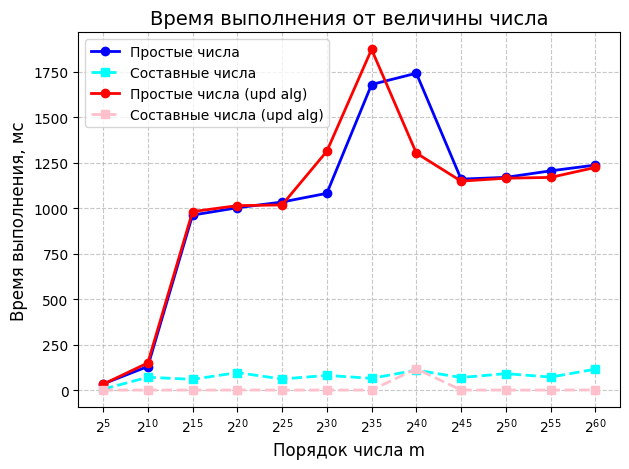

In [190]:
plt.plot(
    degrees,
    time_prime,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='blue',
    label='Простые числа'
)

plt.plot(
    degrees,
    time_comp,
    marker='s',
    linestyle='--',
    linewidth=2,
    color='cyan',
    label='Составные числа'
)


plt.plot(
    degrees,
    time_prime_upd,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='red',
    label='Простые числа (upd alg)'
)

plt.plot(
    degrees,
    time_comp_upd,
    marker='s',
    linestyle='--',
    linewidth=2,
    color='pink',
    label='Составные числа (upd alg)'
)


plt.xticks(degrees, [rf'$2^{{{x}}}$' for x in degrees])
plt.xlabel('Порядок числа m', fontsize=12)
plt.ylabel('Время выполнения, мс', fontsize=12)
plt.title('Время выполнения от величины числа', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

## Вероятность

In [143]:
primes = []
composites = []

for i in range(10**7 + 1, 2 * 10**7, 2):
    if isprime(i):
        primes.append(i)
    else:
        composites.append(i)

In [144]:
k = 5
success_prime = [is_prime1(num, k)==True for num in primes]
success_comp = [is_prime1(num, k)==True for num in composites]

In [151]:
print(f'Относительная частота корректности для простых чисел: {np.mean(success_prime)}\n')

print(f'Относительная частота ошибки для составных чисел: {np.mean(success_comp):.10f}')
print(f'Теоретическая вероятность ошибки для состаных чисел: {(1 / 2 ** k):.5f}\n')

print(f'Относительная частота корректности, если m - вероятно, простое: {sum(success_prime) / (sum(success_prime) + sum(success_comp)):.7f}')
print(f'Теоретическая вероятность корректности, если m - вероятно, простое: {(1 - 1 / 2 ** k):.5f}\n')

Относительная частота корректности для простых чисел: 1.0

Относительная частота ошибки для составных чисел: 0.0000002276
Теоретическая вероятность ошибки для состаных чисел: 0.03125

Относительная частота корректности, если m - вероятно, простое: 0.9999983
Теоретическая вероятность корректности, если m - вероятно, простое: 0.96875



## Зависимость от k

In [193]:
primes = []
composites = []
for i in range(10**6 + 1, 2 * 10**6, 2):
    if isprime(i):
        primes.append(i)
    else:
        composites.append(i)

print(len(primes), len(composites))

70435 429565


In [194]:
iterations = [1, 3, 5, 10, 20, 30, 50, 100]
probs_comp = []
probs = []
times = []
for k in iterations:
    print(k)
    start_time = time.perf_counter()

    success_prime = [is_prime1(num, k)==True for num in primes]
    if np.mean(success_prime) < 1:
        print(k, np.mean(success_prime))

    success_comp = [is_prime1(num, k)==True for num in composites]
    probs_comp.append(np.mean(success_comp))

    probs.append(sum(success_prime) / (sum(success_prime) + sum(success_comp)))

    end_time = time.perf_counter()
    times.append((end_time - start_time) * 1000)

1
3
5
10
20
30
50
100


In [197]:
probs_comp_upd = []
probs_upd = []

times_upd = []
for k in iterations:
    print(k)
    start_time = time.perf_counter()

    success_prime = [is_prime2(num, k)==True for num in primes]
    if np.mean(success_prime) < 1:
        print(k, np.mean(success_prime))

    success_comp = [is_prime2(num, k)==True for num in composites]
    probs_comp_upd.append(np.mean(success_comp))

    probs_upd.append(sum(success_prime) / (sum(success_prime) + sum(success_comp)))

    end_time = time.perf_counter()
    times_upd.append((end_time - start_time) * 1000)

1
3
5
10
20
30
50
100


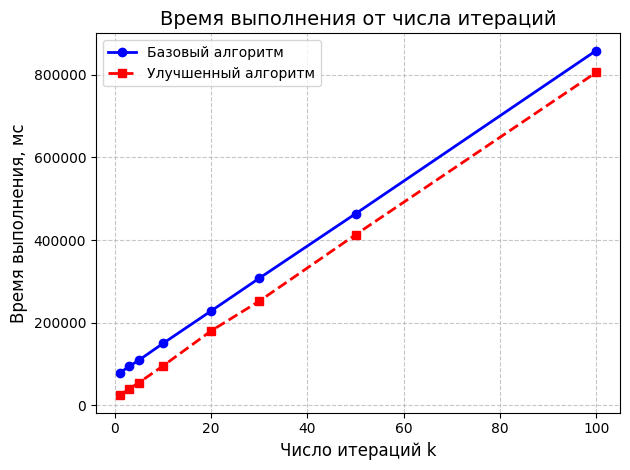

In [198]:
plt.plot(
    iterations,
    times,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='blue',
    label='Базовый алгоритм'
)

plt.plot(
    iterations,
    times_upd,
    marker='s',
    linestyle='--',
    linewidth=2,
    color='red',
    label='Улучшенный алгоритм'
)


plt.xlabel('Число итераций k', fontsize=12)
plt.ylabel('Время выполнения, мс', fontsize=12)
plt.title('Время выполнения от числа итераций', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

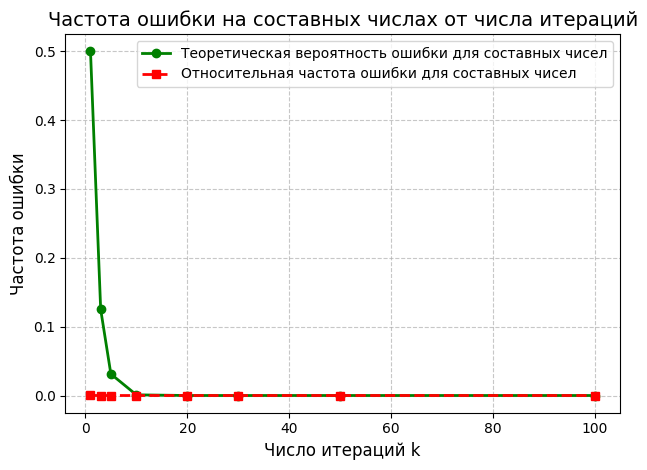

In [199]:
plt.plot(
    iterations,
    [1 / 2 ** k for k in iterations],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='green',
    label='Теоретическая вероятность ошибки для составных чисел'
)

plt.plot(
    iterations,
    probs_comp,
    marker='s',
    linestyle='--',
    linewidth=2,
    color='red',
    label='Относительная частота ошибки для составных чисел'
)

plt.xlabel('Число итераций k', fontsize=12)
plt.ylabel('Частота ошибки', fontsize=12)
plt.title('Частота ошибки на составных числах от числа итераций', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

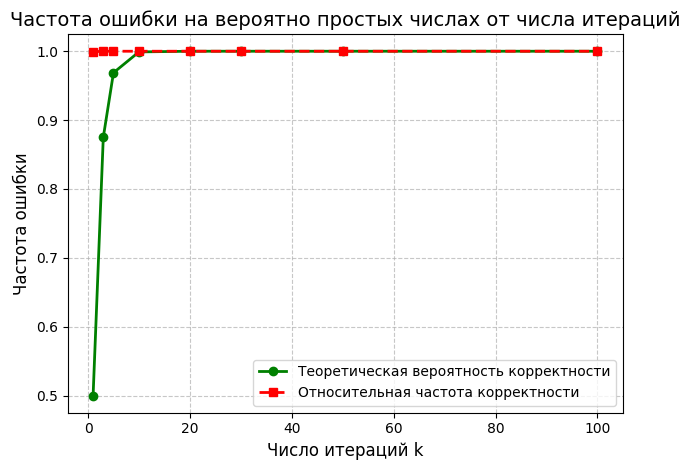

In [200]:
plt.plot(
    iterations,
    [1 - 1 / 2 ** k for k in iterations],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='green',
    label='Теоретическая вероятность корректности'
)

plt.plot(
    iterations,
    probs,
    marker='s',
    linestyle='--',
    linewidth=2,
    color='red',
    label='Относительная частота корректности'
)

plt.xlabel('Число итераций k', fontsize=12)
plt.ylabel('Частота ошибки', fontsize=12)
plt.title('Частота ошибки на вероятно простых числах от числа итераций', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()